# BERT ile Phishing URL'leri Tespit Sistemi

## Gerekli Paketleri Yükleme

In [ ]:
!pip install -q keras-nlp tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.7 MB/s eta 0:00:00


In [ ]:
import os
import warnings

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras_nlp
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

warnings.filterwarnings("ignore")

Using TensorFlow backend


In [ ]:
drive.mount("/gdrive")

%cd /gdrive

os.chdir("/gdrive/MyDrive/Mezuniyet Tezi")

Mounted at /gdrive
/gdrive


## Veri Seti ve Model Yüklenmesi

In [ ]:
model = keras.saving.load_model("./model/url_detection_model.keras")

In [ ]:
val_df = pd.read_pickle("./veri-seti-pickle/pickle_val_20000.pkl")

x_test = tf.convert_to_tensor(val_df['url'])
y_test = tf.convert_to_tensor(val_df['label'])

#Tensorflow dataset'e dönüşüm yapıldı.
val_data = tf.data.Dataset.from_tensor_slices((x_test,y_test))
val_data = val_data.batch(32)

In [ ]:
model.summary()

Preprocessor: "bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ segment_ids (InputLayer)                      │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bert_backbone (BertBackbone)                  │ {sequence_output: (None, None, 768),   │     109,482,240 │
│                                               │ pooled_output: (None, 768)}            │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ classifier_dropout (Dropout)                  │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,538 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 109,483,778 (417.65 MB)

 Trainable params: 109,483,778 (417.65 MB)

 Non-trainable params: 0 (0.00 B)

# Test Kodları

In [ ]:
model.evaluate(x_test, y_test)

 49/625 [=>............................] - ETA: 8:41 - loss: 0.1142 - sparse_categorical_accuracy: 0.9758

KeyboardInterrupt: 

In [ ]:
y_preds = model.predict(x_test)
y_preds = [np.argmax(pred) for pred in y_preds]

print(classification_report(y_test, y_preds))

<Axes: >

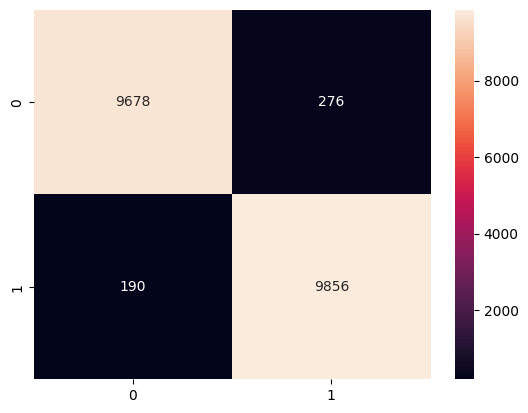

In [ ]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt="d")

## Elle Deneme İçin

In [ ]:
def preprocessInput(text):
  regex = "^(?:\w*\:\/\/)?(.*)"
  total_text = re.findall(regex, text)
  lastStr = ''.join(total_text)
  lastStr = lastStr.replace('www.','')
  lastStr = lastStr.replace('.',' ')
  lastStr = lastStr.replace('/',' ')
  print("Preprocess Sonucu: "+lastStr)
  return lastStr

def predictLabel(text):
  url = preprocessInput(text)
  pred = model.predict([url])
  pred = np.argmax(pred,axis=1)

  if pred == 1:
    print("Phishing URL")
  else:
    print("Normal URL")
  return pred

In [ ]:
urlInput = str(input("Lütfen URL verin: "))
binary_pred = predictLabel(urlInput)